# This is a Basic Sentiment Analysis Project | Aadi Kulkarni
# Libraries Used
Tensorflow/Keras - Used for defining, building, and training the model
Pandas - Used for loading the dataset
Numpy - Used for working with arrays
Matplotlib - Used for plotting the data
Scikit-learn - Used for splitting the data into train and test sets
Math - Used for rounding.

# Importing necessary libraries

In [68]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import losses
from sklearn.model_selection import train_test_split
import math

# Load in our dataset
This will take out CSV filed named `data.csv` and create a dataframe out of it with **Pandas**.
X is going to be the input data. It is getting the column named `text` from the dataframe.
y is going to be the output data. It is getting the column named `label` from the dataframe.

In [45]:
df = pd.read_csv('data.csv') # Dataframe

X = df['text'] # Input data
y = df['label'] # Output data

# Preprocessing the data
This section of code is going to do the following:
- Tokenize the text (Eg. "Hello, my name is John" -> ['Hello', 'my', 'name', 'is', 'John'])
- Convert the text to sequences (Eg. ['Hello', 'my', 'name', 'is', 'John'] -> [[3, 6, 8, 2, 4]])
- pad the sequences so they are all the same dimension (Eg. [[3, 6, 8, 2, 4], [3, 6, 8, 2, 4]] -> [[0, 0, 0, 0, 0, 0, 3, 6, 8, 2, 4], [0, 0, 0, 0, 0, 0, 3, 6, 8, 2, 4]]) This is because the model expects all the sequences to be the same dimension or same length so each sequence has a use, there are no "holes" in the sequence.

# Important Note
We aren't preprocessing the labels/y/output data because unlike X, the y is already in a numerical format that all has the same dimension. "1 and 0"

In [46]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

# Convert the text to sequences
X_seq = tokenizer.texts_to_sequences(X)

# pad the sequences so they are all the same dimension
X_pad = pad_sequences(X_seq)

We can now "visualize" what the X data might look like the the neural network. We can do this by printing out the first 5 sequences.

In [47]:
print("Preview of X_pad:", X_pad[:5])
print('Preview of X_seq: ', X_seq[:5])
# This is to show why we pad the sequences
print("Shape of X_seq 1 and X_seq 2:", len(X_seq[0]), len(X_seq[1]))
print("Shape of X_pad 1 and X_pad 2:", len(X_pad[0]), len(X_pad[1]))

Preview of X_pad: [[   0    0    0 ...  280  243    8]
 [   0    0    0 ...   47  543   93]
 [   0    0    0 ...  162   38  496]
 [   0    0    0 ...    1 1114  455]
 [   0    0    0 ...    3  510  652]]
Preview of X_seq:  [[10, 219, 927, 11, 216, 119, 14, 110, 2, 655, 7567, 2383, 80, 1153, 4243, 13, 619, 8, 9, 3, 2593, 18, 93, 27, 257, 2, 1365, 14878, 3026, 95, 2, 435, 14879, 418, 1023, 10, 1775, 12, 1, 2299, 13, 29, 1, 92, 20, 1, 76, 502, 4, 1, 636, 820, 143, 10, 96, 25, 39, 2015, 53, 3, 2697, 637, 1, 636, 5, 79, 1, 2299, 38, 55, 5, 1, 220, 5, 430, 1, 1169, 18, 93, 132, 21, 39, 79, 53, 3, 1192, 637, 1, 815, 5, 104, 220, 8, 149, 1248, 3551, 5, 12, 10, 311, 34, 10, 948, 5, 39, 3176, 3027, 20, 1, 5845, 3, 180, 902, 1983, 65, 8, 1124, 16, 67, 47, 1983, 65, 8, 1124, 13, 32, 350, 4, 11, 118, 32, 350, 44, 60, 10, 345, 50, 121, 582, 12, 10, 65, 283, 173, 89, 2, 50, 3938, 863, 7040, 18361, 4834, 464, 20, 1240, 4395, 38, 24641, 2127, 15, 153, 1617, 5, 145, 54, 4396, 53, 15, 3, 283, 173, 10, 13

Now we will split our data into train and test sets. This is so that we can train our model on the data, we can evaluate it's performance on unseen data.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2)

# Define the model
We will now be defining the model with the following architecture and layers.
In a nutshell, here is the job of each layer:
- **Embedding Layer:** This layer takes in an integer matrix of size (input_dim, output_dim) as input and produces an output matrix of size (input_dim, output_dim) as output. This layer is used to learn word vectors.
- **GlobalAveragePooling1D:** This layer takes in a list of vectors and returns a vector with the average of the list of vectors.
- **Dropout:** This layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.
- **Dense:** This layer has 32 units which are used to compute an output and uses the relu activation function.
- **Dense:** This layer has 16 units which are used to compute an output and uses the relu activation function.
- **Dense:** This layer has 1 unit which is used to compute an output and uses the sigmoid activation function to output a value between 0 and 1 or the probability of the input being true/positive.

In [49]:
model = keras.Sequential([
    layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32),
    layers.GlobalAveragePooling1D(),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

At this point, we will now compile the model. This means that we will specify the loss function, the optimizer, and the metrics we are interested in evaluating the model.
What we will use:
- **Loss:** Binary-Crossentropy
- **Optimizer:** Adam
- **Metrics:** Accuracy

In [50]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Now we will train the model on our data. `X_train` and `y_train`
We will be using 10 epochs to train the model which means that we will be training the model for 10 iterations with a default batch size of 32.

In [51]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
125/125 [==============================] - 2s 17ms/step - loss: 0.6932 - accuracy: 0.4965
Epoch 2/10
125/125 [==============================] - 2s 17ms/step - loss: 0.6926 - accuracy: 0.5278
Epoch 3/10
125/125 [==============================] - 2s 16ms/step - loss: 0.6889 - accuracy: 0.5625
Epoch 4/10
125/125 [==============================] - 2s 18ms/step - loss: 0.6654 - accuracy: 0.6350
Epoch 5/10
125/125 [==============================] - 2s 18ms/step - loss: 0.5587 - accuracy: 0.7685
Epoch 6/10
125/125 [==============================] - 2s 17ms/step - loss: 0.4065 - accuracy: 0.8490
Epoch 7/10
125/125 [==============================] - 2s 18ms/step - loss: 0.2958 - accuracy: 0.8923
Epoch 8/10
125/125 [==============================] - 2s 16ms/step - loss: 0.2163 - accuracy: 0.9293
Epoch 9/10
125/125 [==============================] - 2s 16ms/step - loss: 0.1689 - accuracy: 0.9490
Epoch 10/10
125/125 [==============================] - 2s 17ms/step - loss: 0.1406 - accura

Now we can evalute how well the model performs on unseen data.

In [61]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

32/32 [==============================] - 0s 2ms/step - loss: 0.3731 - accuracy: 0.8480
Loss: 0.3730926811695099
Accuracy: 0.8479999899864197


As you can see, our accuracy is 84%, but it was 95% when training. This might be caused by overfitting. You can add a validation set to avoid this.
Now lets graph the loss and accuracy of our model when it was training

Text(0.5, 0, 'Epoch')

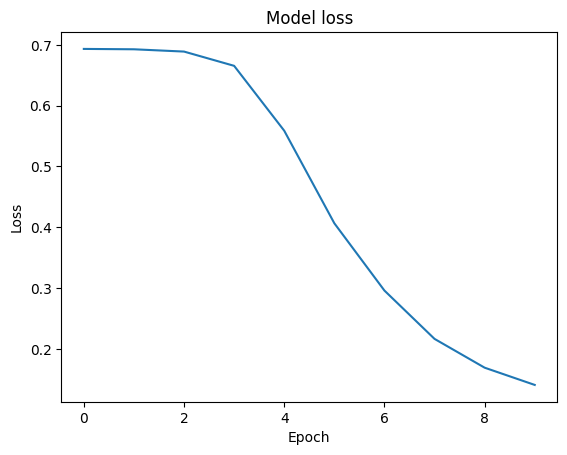

In [55]:
# This will be our training loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

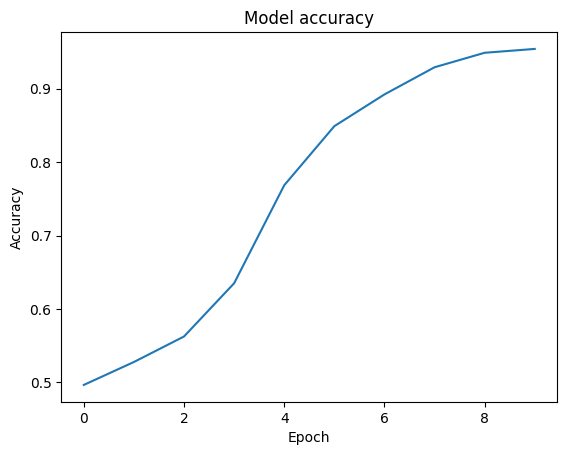

In [56]:
# This will be our accuracy
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

As you can see, as we trained the model, the loss decreased and the accuracy increased. This is a good sign.
Lets now try getting the AI to predict whether a sentence is positive or negative from a user input.

In [83]:
# Predict on test data
prediction = model.predict(X_test)
print(prediction)

# New data
raw_input = input("Enter a sentence: ")
encoded_input = tokenizer.texts_to_sequences([raw_input])
padded_input = pad_sequences(encoded_input)

prediction = model.predict(padded_input)
print("The probability of the sentence being positive is: ", "{:.{precision}f}".format(float(prediction[0][0]), precision=4))

32/32 [==============================] - 0s 3ms/step
[[8.11998308e-01]
 [9.48502421e-01]
 [9.25368909e-03]
 [3.35231097e-03]
 [9.45745766e-01]
 [6.59829497e-01]
 [9.97742176e-01]
 [9.87025976e-01]
 [7.96460927e-01]
 [3.84550318e-02]
 [9.85960383e-03]
 [9.97744560e-01]
 [9.96991396e-01]
 [2.05793767e-03]
 [9.88456547e-01]
 [3.86713371e-02]
 [4.48554307e-01]
 [9.61702645e-01]
 [3.51766832e-02]
 [9.87497866e-01]
 [6.56852648e-02]
 [1.83873266e-01]
 [5.23116924e-02]
 [1.81598812e-01]
 [2.31719203e-02]
 [9.91709352e-01]
 [5.01215518e-01]
 [8.69250774e-01]
 [8.69608760e-01]
 [3.23443823e-02]
 [2.72693411e-02]
 [9.25350264e-02]
 [9.99889851e-01]
 [8.49763393e-01]
 [8.22404385e-01]
 [9.86564100e-01]
 [5.21346867e-01]
 [6.32595837e-01]
 [7.66151965e-01]
 [2.43596197e-03]
 [9.99592006e-01]
 [9.43128526e-01]
 [1.77421067e-02]
 [8.53639722e-01]
 [8.90015841e-01]
 [3.03077232e-02]
 [3.01453501e-01]
 [7.95988083e-01]
 [9.99974370e-01]
 [9.68226790e-01]
 [2.83777267e-01]
 [1.94365233e-01]
 [9.7083866